In [1]:
### Reloads modulesproperly
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.sys.path.append("../")

In [3]:
import numpy as np

In [4]:
import pandas as pd

# Show all the columns and rows in pandas df
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 500)

In [5]:
import matplotlib.pyplot as plt

In [6]:
import mplhep

mplhep.style.use("CMS")

# Read as dataframe

Let's use uproot 4 for this

In [7]:
import uproot

In [8]:
uproot.__version__

'4.1.9'

In [13]:
!ls -lh /mnt/storage/lborgna/

total 0


In [16]:
!ls -lh /media/lucas/MicroSD/00.root

-rw-r--r-- 1 lucas lucas 493M Jan 12 14:41 /media/lucas/MicroSD/00.root


In [18]:
f4 = uproot.open("/media/lucas/MicroSD/00.root")

In [19]:
df = f4["L1TrackNtuple/eventTree;1"].arrays(library="pd")

/home/lucas/anaconda3/envs/db-clustering/lib/python3.8/site-packages/uproot/interpretation/library.py:755: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


In [20]:
len(df)

3

In [21]:
trk = df[0]

In [22]:
tp = df[1]

In [23]:
tp.head()

tp_pt    tp_eta    tp_phi   tp_dxy     tp_d0     tp_z0  \
entry subentry                                                                
0     0         100.300301 -0.898876  0.061430  0.00125  0.000543  3.500762   
      1           2.052715 -1.650001 -2.781972  0.00125  0.000306  3.496469   
      2           6.453084 -0.604645 -2.807965  0.00125  0.000281  3.498704   
      3           8.502528 -0.446424 -1.675735  0.00125  0.001191  3.499362   
      4           7.538472 -1.650967 -1.311853  0.00125  0.001264  3.499881   

                tp_d0_prod  tp_z0_prod  tp_pdgid  tp_nmatch  tp_nloosematch  \
entry subentry                                                                
0     0          -0.000073    3.499485        13          1               1   
      1          -0.000297    3.499485       211          1               1   
      2          -0.000265    3.499485      2212          1               1   
      3          -0.001218    3.499485      -321          1               1   
      4          -0.001238    3.499485      -211          1               1   

                tp_nstub  tp_eventid  tp_charge  tp_injet  tp_injet_highpt  \
entry subentry                                                               
0     0                8           0         -1         1                1   
      1                9           0          1         0                0   
      2                8           0          1         0                0   
      3                5           0         -1         1                0   
      4                7           0         -1         1                0   

                tp_injet_vhighpt  matchtrk_pt  matchtrk_eta  matchtrk_phi  \
entry subentry                                                              
0     0                        0   102.943588     -0.900577      0.061580   
      1                        0     2.034012     -1.651574     -2.782407   
      2                        0     6.475194     -0.604991     -2.808045   
      3                        0     8.506432     -0.449548     -1.675164   
      4                        0     7.589015     -1.650129     -1.310603   

                matchtrk_z0  matchtrk_d0  matchtrk_chi2  matchtrk_bendchi2  \
entry subentry                                                               
0     0            3.574219       -999.0       7.661629           0.025519   
      1            3.750000       -999.0       8.667765           1.376251   
      2            3.574219       -999.0       4.947954           1.358919   
      3            3.574219       -999.0       3.709781           0.449784   
      4            3.457031       -999.0      18.657181           0.499871   

                matchtrk_nstub  matchtrk_lhits  matchtrk_dhits  matchtrk_seed  \
entry subentry                                                                  
0     0                      6          111111               0              0   
      1                      6              11            1111              0   
      2                      6          111111               0              0   
      3                      5          111011               0              0   
      4                      6              11            1111              0   

                matchtrk_injet  matchtrk_injet_highpt  matchtrk_injet_vhighpt  \
entry subentry                                                                  
0     0                      1                      1                       0   
      1                      0                      0                       0   
      2                      0                      0                       0   
      3                      1                      0                       0   
      4                      1                      0                       0   

                loosematchtrk_pt  loosematchtrk_eta  loosematchtrk_phi  \
entry subentry                                                       

uproot read this data into a multi-indexed pandas dataframe. The main index 'entry' represents the event number and then second level index. 'subentry' is the entry for each track in the event. This is better than uproot3 that reads each event with a list of tp parameters that are difficult to access.

**We are gonna switch to using the reconstructed tracks now**

Lets play around trying to understand these trk parameters better

In [24]:
tp.groupby(["entry"])["tp_pt"].mean()[1]

3.4658437

In [25]:
trk.groupby(["entry"])["trk_pt"].mean()[1]

3.4372349

In [26]:
tp.groupby(level=0)["tp_pt"].count()

entry
0        229
1        166
2        180
3        145
4        156
        ... 
24943    184
24944    193
24945    201
24946    194
24947    136
Name: tp_pt, Length: 24948, dtype: int64

In [27]:
trk.groupby(level=0)["trk_pt"].count()

entry
0        239
1        173
2        175
3        153
4        166
        ... 
24943    191
24944    192
24945    225
24946    209
24947    139
Name: trk_pt, Length: 24948, dtype: int64

In [28]:
diff = np.abs(
    trk.groupby(level=0)["trk_pt"].count() - tp.groupby(level=0)["tp_pt"].count()
)

<AxesSubplot:>

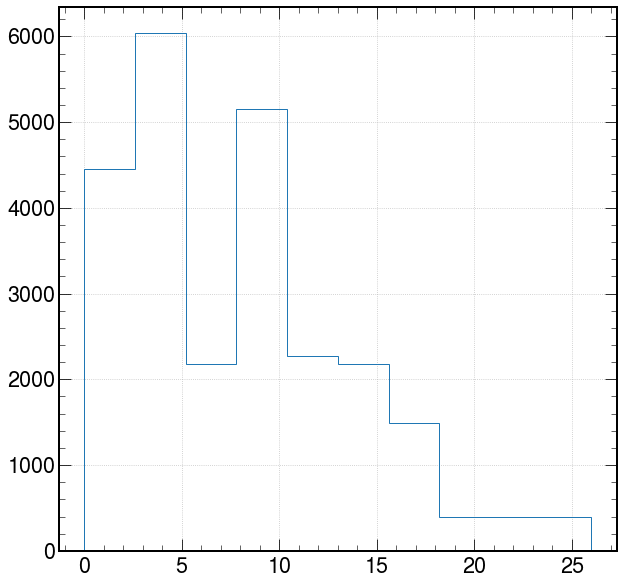

In [29]:
diff.hist(histtype="step")

In [30]:
trk

trk_pt   trk_eta   trk_phi  trk_d0    trk_z0   trk_chi2  \
entry subentry                                                              
0     0         3.294195  0.672711 -0.235986   999.0 -7.207031   3.886195   
      1         3.299082  0.070255 -0.303737   999.0  5.800781   3.457583   
      2         4.282707  1.931356 -0.272299   999.0 -7.558594   2.652499   
      3         2.730331 -1.494013 -0.168791   999.0  0.000000   3.931520   
      4         2.346045  1.780082  0.038812   999.0  0.117188  25.375839   
...                  ...       ...       ...     ...       ...        ...   
24947 134       2.178273 -1.970004 -1.128330   999.0  4.160156   6.256404   
      135       2.364003  0.895117 -0.621172   999.0  8.554688   2.396245   
      136       2.195913 -1.472945 -0.762705   999.0  8.261719   3.615788   
      137       2.516502 -1.896394 -0.741756   999.0  5.917969  20.023378   
      138       2.317679 -0.433555 -0.270725   999.0  4.160156   8.480442   

                trk_bendchi2  trk_nstub  trk_lhits  trk_dhits  trk_seed  \
entry subentry                                                            
0     0             0.565463          6     111111          0         0   
      1             1.158106          6     111111          0         0   
      2             1.138293          6         11       1111         0   
      3             0.562027          5        111        110         0   
      4             0.787909          6         11      10111         0   
...                      ...        ...        ...        ...       ...   
24947 134           1.619150          6         11       1111         0   
      135           2.362869          5      11111          0         0   
      136           0.278036          6        111        111         0   
      137           0.897107          6         11       1111         0   
      138           1.150294          6     111111          0         0   

                trk_genuine  trk_loose  trk_unknown  trk_combinatoric  \
entry subentry                                                          
0     0                   1          1            0                 0   
      1                   1          1            0                 0   
      2                   1          1            0                 0   
      3                   1          1            0                 0   
      4                   1          1            0                 0   
...                     ...        ...          ...               ...   
24947 134                 1          1            0                 0   
      135                 1          1            0                 0   
      136                 1          1            0                 0   
      137                 1          1            0                 0   
      138                 1          1            0                 0   

                trk_fake  trk_matchtp_pdgid  trk_matchtp_pt  trk_matchtp_eta  \
entry subentry                                                                 
0     0                2                211        3.307104         0.678369   
      1                2               -211        3.333383         0.069476   
      2                2               -211        4.196679         1.933154   
      3                2                211        2.740556        -1.497854   
      4                2               2212        2.332434         1.780198   
...                  ...                ...             ...              ...   
24947 134              2               -211        2.198662        -1.968237   
      135              2                211        2.396504         0.890380   
      136              2               -321        2.205768        -1.469311   
      137              2               -211        2.740320        -1.867672   
      138              2                211        2.319110        -0.436025   

                trk_matchtp_phi  trk_matchtp_z0  

Let's see what the first event looks like

In [31]:
event1 = trk.loc[0, :]
event1_tp = tp.loc[0, :]

In [32]:
import matplotlib

In [33]:
import random

In [34]:
random.random()

0.45466196312230434

In [35]:
n = len(event1)
n_tp = len(event1_tp)

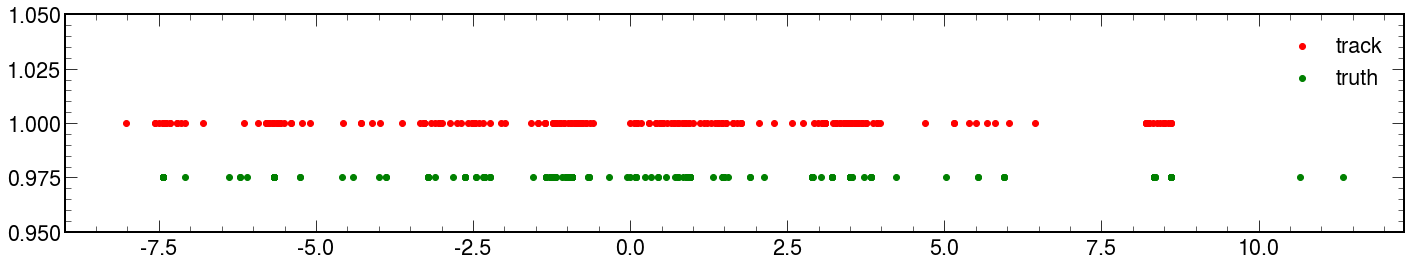

In [36]:
fig, ax = plt.subplots(figsize=(24, 4))


plt.scatter(event1.trk_z0, n * [1], color="red", label="track")
plt.scatter(event1_tp.tp_z0, n_tp * [0.975], color="green", label="truth")
plt.ylim(0.950, 1.050)
plt.legend()

Thinks look fine, I can't colour code and scale the size of these because i don't have the id of the cluster that they belong to like in the truth parameters

**ASSUMPTION! - The truth parameters (tp) and track reco parameters (trk) are reconstructed in the same index!**

# True Primary Vertex $z_{0}$

Before we can actually quantify anything about the different algorithms we use, we need to first find out what the "truth" z0 of the primary vertex actually is. To do this we will use the following procedure.
- For each event, find all the truth tracks that belong to the primary vertex by using the `tp_eventid == 0` mask
- Remove any instance of a secondary vertex by setting that $|d_0| < 0.01$ cm (Unclear as to why this is needed given the mask above)
- Take the mean of all the remaining tracks in the event and this corresponds to the "truth" or true primary vertex $z_0$.

In [31]:
mask_pv_me = tp["tp_eventid"] == 0

In [32]:
mask_no_sv_me = (tp["tp_d0"].abs()) < 0.01

In [33]:
tp.loc[mask_pv_me & mask_no_sv_me]

tp_pt    tp_eta    tp_phi    tp_dxy     tp_d0     tp_z0  \
entry subentry                                                                 
0     0         100.300301 -0.898876  0.061430  0.001250  0.000543  3.500762   
      1           2.052715 -1.650001 -2.781972  0.001250  0.000306  3.496469   
      2           6.453084 -0.604645 -2.807965  0.001250  0.000281  3.498704   
      3           8.502528 -0.446424 -1.675735  0.001250  0.001191  3.499362   
      4           7.538472 -1.650967 -1.311853  0.001250  0.001264  3.499881   
...                    ...       ...       ...       ...       ...       ...   
24947 6          37.316452 -0.756630 -2.015774  0.184507  0.000236  0.304796   
      7          17.461126 -0.740513 -2.011680  0.184507 -0.000417  0.300494   
      8          12.040825 -1.560167  1.599031  0.052139 -0.000663  0.309680   
      9           3.084901  1.153923  2.541652  0.015098 -0.000248  0.300785   
      10          4.724505 -1.555800  1.565668  0.052139  0.001023  0.308990   

                tp_d0_prod  tp_z0_prod  tp_pdgid  tp_nmatch  tp_nloosematch  \
entry subentry                                                                
0     0          -0.000073    3.499485        13          1               1   
      1          -0.000297    3.499485       211          1               1   
      2          -0.000265    3.499485      2212          1               1   
      3          -0.001218    3.499485      -321          1               1   
      4          -0.001238    3.499485      -211          1               1   
...                    ...         ...       ...        ...             ...   
24947 6          -0.000308    0.150999      -321          1               1   
      7           0.000447    0.150999       211          1               1   
      8           0.000682    0.191020       321          1               1   
      9           0.000255    0.322353      -211          1               1   
      10         -0.001057    0.191020      -211          2               2   

                tp_nstub  tp_eventid  tp_charge  tp_injet  tp_injet_highpt  \
entry subentry                                                               
0     0                8           0         -1         1                1   
      1                9           0          1         0                0   
      2                8           0          1         0                0   
      3                5           0         -1         1                0   
      4                7           0         -1         1                0   
...                  ...         ...        ...       ...              ...   
24947 6                8           0         -1         1                1   
      7                9           0          1         1                1   
      8               11           0          1         1                0   
      9                7           0         -1         0                0   
      10              10           0         -1         1                0   

                tp_injet_vhighpt  matchtrk_pt  matchtrk_eta  matchtrk_phi  \
entry subentry                                                              
0     0                        0   102.943588     -0.900577      0.061580   
      1                        0     2.034012     -1.651574     -2.782407   
      2                        0     6.475194     -0.604991     -2.808045   
      3                        0     8.506432     -0.449548     -1.675164   
      4                        0     7.589015     -1.650129     -1.310603   
...                          ...          ...           ...           ...   
24947 6                        0    37.687820     -0.754480     -2.015893   
      7                        0    17.344629     -0.740883     -2.011434   
      8                        0    12.137454     -1.559636      1.598343   
      9                        0     3.093463      1.155117      2.541423   
      10     

In [34]:
tp

tp_pt    tp_eta    tp_phi    tp_dxy     tp_d0     tp_z0  \
entry subentry                                                                 
0     0         100.300301 -0.898876  0.061430  0.001250  0.000543  3.500762   
      1           2.052715 -1.650001 -2.781972  0.001250  0.000306  3.496469   
      2           6.453084 -0.604645 -2.807965  0.001250  0.000281  3.498704   
      3           8.502528 -0.446424 -1.675735  0.001250  0.001191  3.499362   
      4           7.538472 -1.650967 -1.311853  0.001250  0.001264  3.499881   
...                    ...       ...       ...       ...       ...       ...   
24947 131         2.515927 -1.344955  2.283078  0.000222 -0.000221  7.912414   
      132         2.869779  1.953141 -0.978675  0.000222  0.000216  7.912527   
      133         2.205768 -1.469311 -0.762871  0.003592  0.000253  7.909946   
      134         2.010632 -1.296187  0.080920  0.001015  0.000989 -1.899230   
      135         2.424364 -1.384162  0.262355  0.001015  0.000934 -1.898866   

                tp_d0_prod  tp_z0_prod  tp_pdgid  tp_nmatch  tp_nloosematch  \
entry subentry                                                                
0     0          -0.000073    3.499485        13          1               1   
      1          -0.000297    3.499485       211          1               1   
      2          -0.000265    3.499485      2212          1               1   
      3          -0.001218    3.499485      -321          1               1   
      4          -0.001238    3.499485      -211          1               1   
...                    ...         ...       ...        ...             ...   
24947 131         0.000219    7.912319     -2212          1               1   
      132        -0.000213    7.912319       211          1               1   
      133        -0.000266    7.902583      -321          1               1   
      134        -0.000991   -1.899601       211          0               0   
      135        -0.000935   -1.899601      -211          1               1   

                tp_nstub  tp_eventid  tp_charge  tp_injet  tp_injet_highpt  \
entry subentry                                                               
0     0                8           0         -1         1                1   
      1                9           0          1         0                0   
      2                8           0          1         0                0   
      3                5           0         -1         1                0   
      4                7           0         -1         1                0   
...                  ...         ...        ...       ...              ...   
24947 131              7         149         -1         0                0   
      132              8         149          1         0                0   
      133              9         149         -1         0                0   
      134              6         155          1         0                0   
      135              6         155         -1         0                0   

                tp_injet_vhighpt  matchtrk_pt  matchtrk_eta  matchtrk_phi  \
entry subentry                                                              
0     0                        0   102.943588     -0.900577      0.061580   
      1                        0     2.034012     -1.651574     -2.782407   
      2                        0     6.475194     -0.604991     -2.808045   
      3                        0     8.506432     -0.449548     -1.675164   
      4                        0     7.589015     -1.650129     -1.310603   
...                          ...          ...           ...           ...   
24947 131                      0     2.499530     -1.347972      2.285152   
      132                      0     2.931165      1.954933     -0.979100   
      133                      0     2.195913     -1.472945     -0.762705   
      134                      0  -999.000000   -999.000000   -999.000000   
      135    

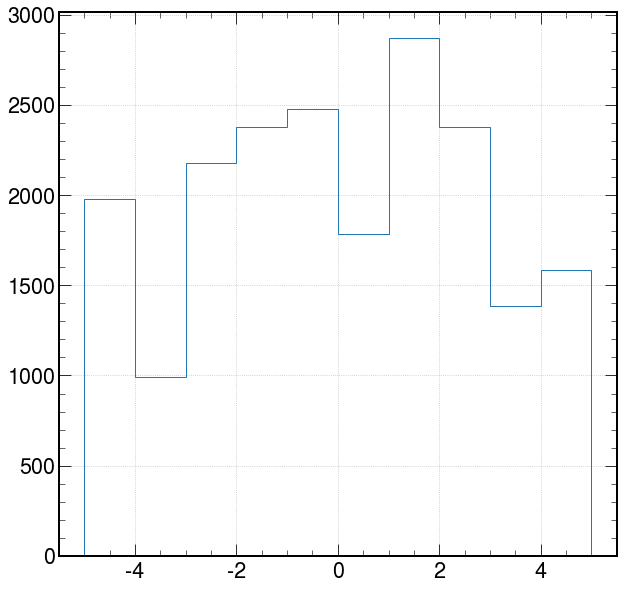

In [35]:
tp.loc[mask_pv_me & mask_no_sv_me].groupby(level=0)["tp_z0"].mean().hist(
    bins=10, range=(-5.0, 5.0), histtype="step"
)
true_z0_me = tp.loc[mask_pv_me & mask_no_sv_me].groupby(level=0)["tp_z0"].mean()

let's compare this with the solution from Rob (making sure to use uproot 3)

In [37]:
import uproot3

In [41]:
f3 = uproot3.open("/mnt/storage/lborgna/track/00.root")
events3 = f3["L1TrackNtuple/eventTree"]

In [42]:
tp_vertex_id = events3["tp_eventid"].array()
tp_z0 = events3["tp_z0"].array()
tp_d0 = events3["tp_d0"].array()
trk_z0 = events3["trk_z0"].array()
trk_pt = events3["trk_pt"].array()
mask = tp_vertex_id == 0
mask_no_sv = np.abs(tp_d0) < 0.01
true_z0 = tp_z0[mask & mask_no_sv].mean()
matchtrk_z0 = events3["matchtrk_z0"].array()

In [43]:
be = np.linspace(-5, 5, 11)

Text(0.5, 1.0, 'Comparing the two methods of getting the $z_0$')

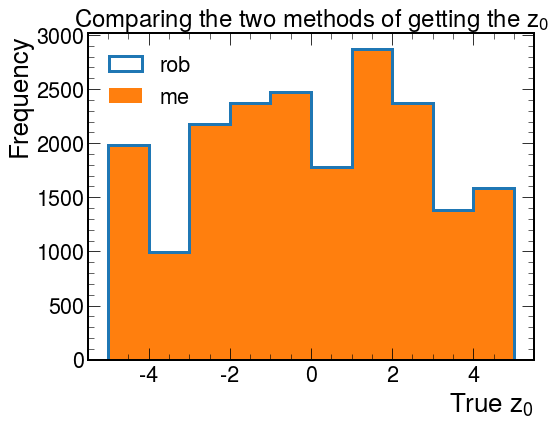

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

h_rob, _, _ = ax.hist(true_z0, bins=be, histtype="step", label="rob", lw=3)
h_me, _, _ = ax.hist(true_z0_me, bins=be, label="me", lw=0)
ax.legend()
ax.set_ylabel("Frequency")
ax.set_xlabel(r"True $z_0$")
ax.set_title("Comparing the two methods of getting the $z_0$", fontsize=24)

This compares the method I use to get the True $z_0$ which is based on reading the data as a multiindexed pandas df by using uproot 4, versus the jaggedArray that uproot 3 interprets the data as. 
With this we can now define a function to return a dataframe of all the true $z_0$ values

In [45]:
def true_z0(df: pd.DataFrame) -> pd.DataFrame:

    mask_pv = df["tp_eventid"] == 0
    mask_no_sv = np.abs(df["tp_d0"]) < 0.01

    z0 = df.loc[mask_pv & mask_no_sv].groupby(level=0)["tp_z0"].mean()
    return z0

In [46]:
z0_gen = true_z0(tp)

In [47]:
z0_gen

entry
0        3.499750
1        0.338214
2       -2.649157
3        1.543104
4        2.421834
           ...   
24943    1.910414
24944   -2.066012
24945   -2.285170
24946   -4.809160
24947    0.305602
Name: tp_z0, Length: 24948, dtype: float32

# Primary Vertex Benchmarks

To quantify how well the primary vertices have been reconstructed the efficiencies can be utilized. The equation below describes the efficiency of the reconstructed primary vertices with respect to the truth primary vertices. Result should be a scalar quantity, but it can be binned as a function of $z_0$

$$ \varepsilon = \frac{N_{reco, Vx}}{N_{truth, Vx}} $$ 

The primary vertex is reconstructed correctly by the clustering algorithm if the $z_0$ is within the accepted resolution window ($\delta$), which is taken to be $\delta = 0.1$ cm

$$ |z_{truth} - z_{reco} | < \delta $$ 

In each clustering algorithm, the primary vertex is obtained by the this highest scalar sum of $p_T$ of the tracks pertaining to that cluster
$$ \sum_{tracks} p_{T}^{tracks}$$

# FastHisto - baseline

From what I understand this algorithm creates a histogram of the $z_0$ that gets weighted by the $p_T$ of the each track. From Davide Cieri's thesis, the optional bin-width of FastHisto was $\varepsilon = 0.15$ cm. This can then be used to find the Primary vertices

In [38]:
be = np.arange(-15, 15.15, 0.15)  # z_0 in [-15, 15]

Text(1, 0, '$z_0$ [cm]')

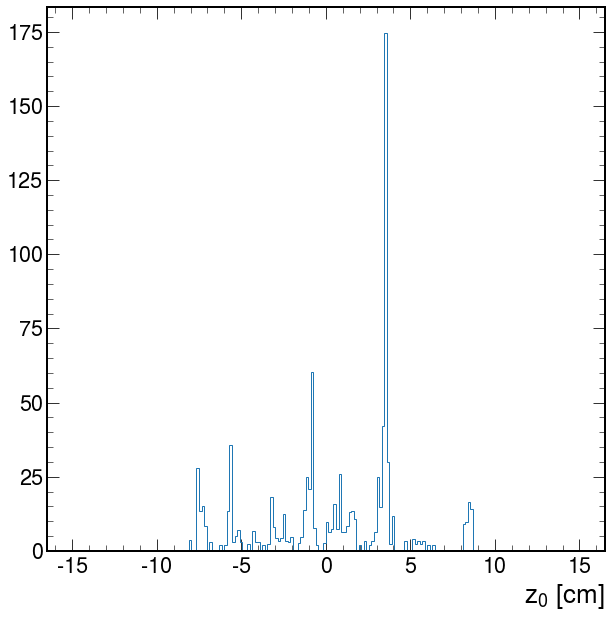

In [39]:
h, be, _ = plt.hist(
    event1["trk_z0"].values, bins=be, histtype="step", weights=event1["trk_pt"]
)
plt.xlabel(r"$z_0$ [cm]")

Quite clearly we can see where the primary vertex is.

In [40]:
np.argmax(h)

123

To find the "reco" $z_0$ from fast histo, we will find all of the tracks that fall within the bin with the highest peak and then calculate the mean. 

In [41]:
mask = (event1["trk_z0"] > be[123]) & (event1["trk_z0"] < be[124])

In [42]:
fast_histo1 = event1.loc[mask, "trk_z0"].mean()
print(fast_histo1)

3.5078125


In [43]:
z0_gen[0]

NameError: name 'z0_gen' is not defined

In [44]:
if np.abs(fast_histo1 - z0_gen[0]) < 0.1:
    print(
        "The primary vertex has been reconstructed within the tolerance level of 0.1 cm"
    )
else:
    print(
        "The primary vertex has NOT been reconstructed within the tolerance level of 0.1 cm"
    )

NameError: name 'z0_gen' is not defined

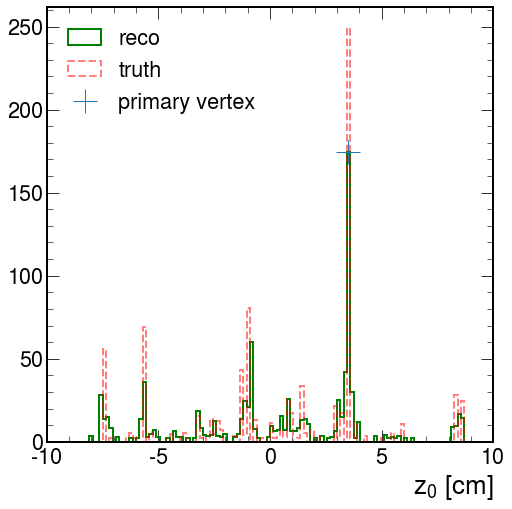

In [54]:
plt.figure(figsize=(8,8))
h, be, _ = plt.hist(
    event1["trk_z0"].values,
    bins=be,
    histtype="step",
    weights=event1["trk_pt"],
    label="reco",
    color= 'green',
    lw=2
)
h_tp, _, _ = plt.hist(
    event1_tp["tp_z0"].values,
    bins=be,
    histtype="step",
    weights=event1_tp["tp_pt"],
    label="truth",
    ls="--",
    alpha=0.5,
    color='red',
    lw=2
)
plt.plot(fast_histo1, h[123], "+", markersize=24, label="primary vertex")
plt.legend(loc='upper left')
plt.xlabel(r"$z_0$ [cm]")
# plt.title("FastHisto Single Event Example")
plt.xlim(-10, 10)
plt.savefig('fasthistoexample.pdf',dpi=600, bbox_inches='tight')

In [1]:
print("h")

h


Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3810, in atexit_operations
    self.reset(new_session=False)
  File "/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1421, in reset
    self.history_manager.reset(new_session)
  File "/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/IPython/core/history.py", line 592, in reset
    self.dir_hist[:] = [os.getcwd()]
FileNotFoundError: [Errno 2] No such file or directory


In [56]:
x = 0.5 * (be[1:] + be[:-1])

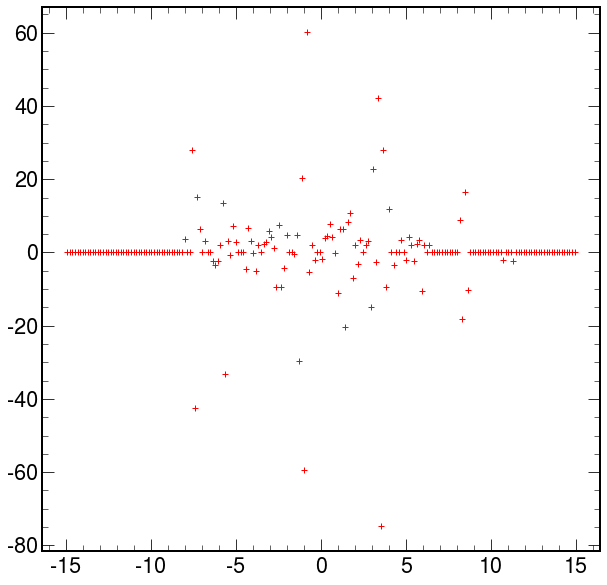

In [57]:
plt.plot(x, (h - h_tp), "r+")

This serves as a check that we understand how fast histo should be used to reconstruct primary vertices. We should now wrap this into a function that does it for all of the events.

In [58]:
event1.trk_z0.values[
    np.where((event1.trk_z0.values < 3.65) & (event1.trk_z0.values > 3.50))
].mean()

3.5791016

In [59]:
def fastHisto(z0, pt, be):

    h = np.histogram(z0, bins=be, weights=pt)[0]
    max_idx = np.argmax(h)
    bin_lower = be[max_idx]
    bin_upper = be[max_idx + 1]
    mask = (z0 > bin_lower) & (z0 < bin_upper)
    z0_reco = z0[mask].mean()

    return z0_reco

In [60]:
z0_fastHisto = trk.groupby(level=0).apply(
    lambda x: fastHisto(x["trk_z0"], x["trk_pt"], be)
)

In [61]:
reco = pd.concat([z0_gen, z0_fastHisto], axis=1)

In [62]:
reco.columns = ["z0_gen", "z0_fastHisto"]

In [63]:
def primary_vertex_efficiency(
    z0_gen: np.array, z0_reco: np.array, delta: float = 0.1
) -> pd.DataFrame:
    mask = np.abs(z0_gen - z0_reco) < delta

    total = z0_gen.shape[0]

    reconstructed = z0_gen[mask].shape[0]

    return 100 * (reconstructed / total)

In [64]:
primary_vertex_efficiency(reco["z0_gen"].values, reco["z0_fastHisto"].values)

65.92111592111593

Fast Histo seems to get a 98 \% Primary vertex reconstruction efficiency, which is pretty crazy, but this is perhaps either because it is the small subset file to test on or because it is the "truth" values that we are using to train on instead of the "track" parameters.

## Efficiency as a function of $z_{0}$

In [65]:
start, stop, step = -15, 15, 0.5
be_eff = np.arange(start, stop + step, step)

In [66]:
be_eff

array([-15. , -14.5, -14. , -13.5, -13. , -12.5, -12. , -11.5, -11. ,
       -10.5, -10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,
        -6. ,  -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,
        -1.5,  -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,
         3. ,   3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,
         7.5,   8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,
        12. ,  12.5,  13. ,  13.5,  14. ,  14.5,  15. ])

In [67]:
len(be_eff)

61

In [68]:
def binominal_error(k, n):
    yerr = (1 / n) * np.sqrt(k * (1 - (k / n)))
    return yerr

In [69]:
def poissonian_error(k, n):

    yerr = (1 / n) * np.sqrt(k)

    return yerr

In [70]:
def bayesian_error(k, n):

    V = (((k + 1) * (k + 2)) / ((n + 2) * (n + 3))) - (((k + 1) ** 2) / ((n + 2) ** 2))
    yerr = np.sqrt(V)
    return yerr

In [71]:
def bin_width_error(bin_edges):
    """
    Determines the horizontal (x) error of a bin  by calculating half the bin size
    :param bin_edges:
    :return: xerr array containing the absolute magnitude of the error in x
    """
    # determines the error in a bin by +/- half of the bin_width
    xerr = []
    for k in range(len(bin_edges)):
        if k != (len(bin_edges) - 1):
            x1 = bin_edges[k]
            x2 = bin_edges[k + 1]
            bin_error = (x2 - x1) / 2
            xerr.append(bin_error)
    xerr = np.asarray(xerr)
    return xerr

In [72]:
eff = []
error_y = []
for i in range(len(be_eff)):
    if i == len(be_eff) - 1:
        break
    mask = (reco["z0_gen"] > be_eff[i]) & (reco["z0_gen"] < be_eff[i + 1])

    mask_true = np.abs(reco["z0_gen"] - reco["z0_fastHisto"]) < 0.1

    total_bin = reco[mask].shape[0]
    reco_bin = reco[mask & mask_true].shape[0]

    error_y.append(binominal_error(reco_bin, total_bin + 0.0000001))

    eff.append(reco_bin / (total_bin + 0.000001))

In [73]:
error_x = bin_width_error(be_eff)

In [74]:
bin_midpoint = 0.5 * (be_eff[:-1] + be_eff[1:])

In [75]:
bin_midpoint

array([-14.75, -14.25, -13.75, -13.25, -12.75, -12.25, -11.75, -11.25,
       -10.75, -10.25,  -9.75,  -9.25,  -8.75,  -8.25,  -7.75,  -7.25,
        -6.75,  -6.25,  -5.75,  -5.25,  -4.75,  -4.25,  -3.75,  -3.25,
        -2.75,  -2.25,  -1.75,  -1.25,  -0.75,  -0.25,   0.25,   0.75,
         1.25,   1.75,   2.25,   2.75,   3.25,   3.75,   4.25,   4.75,
         5.25,   5.75,   6.25,   6.75,   7.25,   7.75,   8.25,   8.75,
         9.25,   9.75,  10.25,  10.75,  11.25,  11.75,  12.25,  12.75,
        13.25,  13.75,  14.25,  14.75])

Text(0, 1, 'Primary Vertex Reconstruction efficiency [%]')

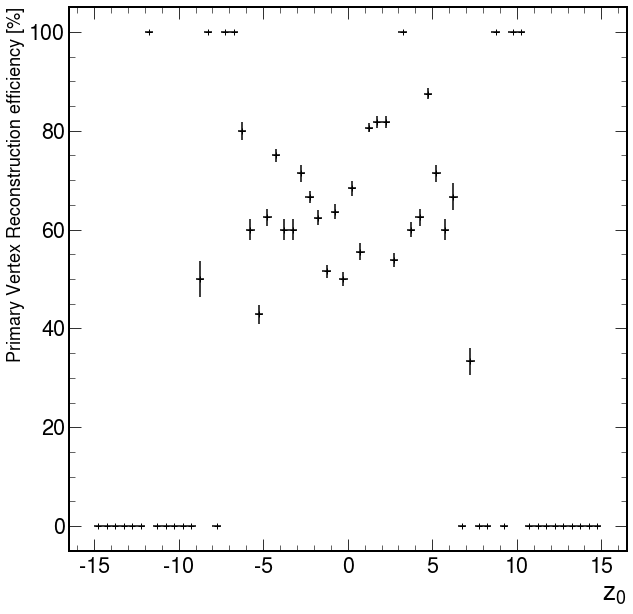

In [76]:
plt.errorbar(
    bin_midpoint,
    100 * np.array(eff),
    xerr=error_x,
    yerr=100 * np.array(error_y),
    fmt="k+",
)
plt.xlabel(r"$z_0$")
plt.ylabel("Primary Vertex Reconstruction efficiency [%]", fontsize=18)

Ok this is weird, but it could be an effect of the low stats that we have (~250 events) its also good to see that some bins seem to give reasonable values

In [77]:
def plot_pv_efficiency_z0(z0_gen: np.array, z0_reco: np.array, bins: np.array):

    eff = np.zeros(bins.shape[0] - 1)
    error_y = np.zeros(bins.shape[0] - 1)

    for i, _ in enumerate(bins):
        if i == bins.shape[0] - 1:
            break
        mask = (z0_gen > bins[i]) & (z0_gen < bins[i + 1])
        mask_true = np.abs(z0_gen - z0_reco) < 0.1
        n = z0_gen[mask].shape[0]

        k = z0_gen[mask & mask_true].shape[0]
        eff[i] = k / (n + 0.0001)
        error_y[i] = binominal_error(k, (n + 0.0001))

    x = 0.5 * (bins[1:] + bins[:-1])
    error_x = 0.5 * (bins[1:] - bins[:-1])

    plt.errorbar(
        x,
        100 * eff,
        xerr=error_x,
        yerr=100 * error_y,
        fmt="k+",
    )
    plt.xlabel(r"$z_0$")
    plt.ylabel("Primary Vertex Reconstruction efficiency [%]", fontsize=18)

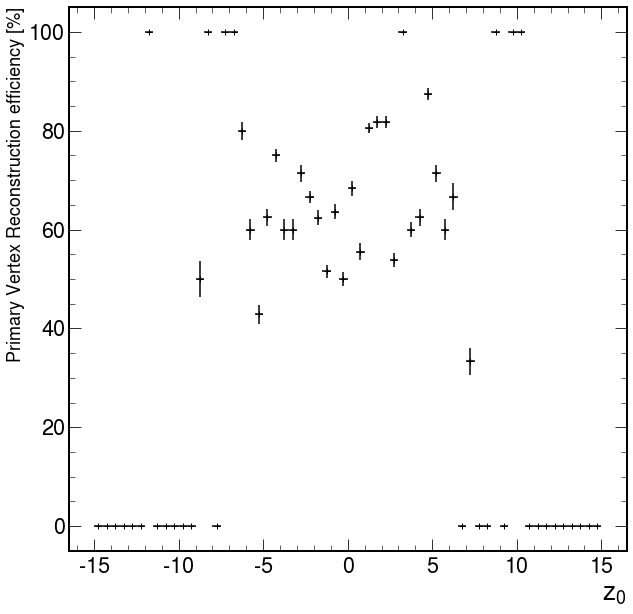

In [78]:
plot_pv_efficiency_z0(reco["z0_gen"].values, reco["z0_fastHisto"].values, bins=be_eff)

In [79]:
def plot_pv_resolution_z0(
    z0_gen: np.array, z0_reco: np.array, bins: np.array, ylim: list = [0, 0.5]
):

    mean_resolution = np.zeros(bins.shape[0] - 1)
    error_resolution = np.zeros(bins.shape[0] - 1)
    mask_true = np.abs(z0_gen - z0_reco) < 0.1
    for i, _ in enumerate(bins):
        if i == bins.shape[0] - 1:
            break
        mask = (z0_gen > bins[i]) & (z0_gen < bins[i + 1])
        resolution = np.abs(z0_gen[mask & mask_true] - z0_reco[mask & mask_true])

        mean_resolution[i] = np.mean(resolution)
        error_resolution[i] = np.std(resolution)

    x = 0.5 * (bins[1:] + bins[:-1])
    error_x = 0.5 * (bins[1:] - bins[:-1])

    plt.errorbar(
        x,
        mean_resolution,
        xerr=error_x,
        yerr=error_resolution,
        fmt="k+",
    )
    plt.xlabel(r"$z_0$")
    plt.ylabel(r"$|z_{Gen} - z_{reco}|$ [cm]", fontsize=18)
    plt.ylim(ylim)

/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.

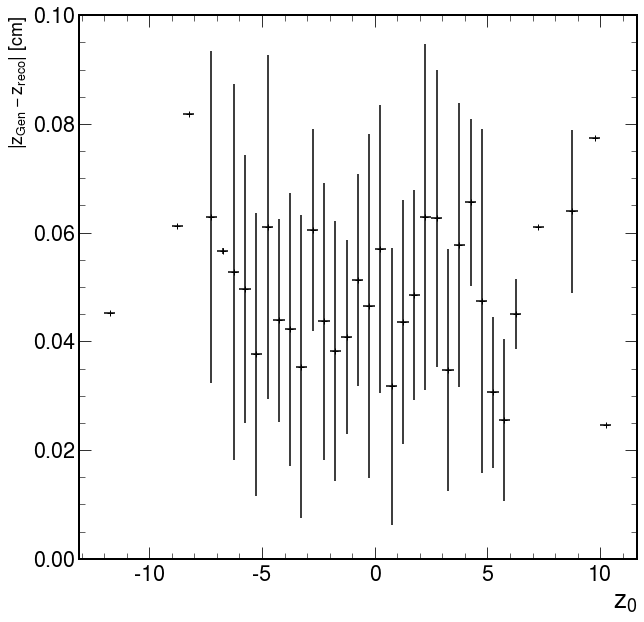

In [80]:
plot_pv_resolution_z0(
    reco["z0_gen"].values, reco["z0_fastHisto"].values, bins=be_eff, ylim=[0, 0.1]
)

I think this looks more comparable with davide Cieris' thesis now

Statistical uncertainty can be reduced by including more statistics

# Testing dbscan

Lets test how dbscan works for this single event. The most optimal results were obtained with DBSCAN parameters:
- minPts = 2 
- $\varepsilon$ = 0.15 cm 
(from Davide Cierri)

In [81]:
from sklearn.cluster import DBSCAN

In [82]:
z0 = event1["trk_z0"].values

In [83]:
db_clustering = DBSCAN(eps=0.15, min_samples=2).fit(z0.reshape(-1, 1))

In [84]:
db_clustering.labels_

array([ 0,  1,  0,  2,  2, -1,  3,  2,  4,  2,  2,  4,  3,  2,  4,  4,  2,
        2,  5,  5,  5,  2,  5,  2,  5,  5,  5,  2,  2,  6,  2, -1,  5,  2,
        4,  1,  7,  7,  3,  3,  2,  8,  2,  6,  4,  2,  2,  7,  0,  7,  6,
        2,  5,  7,  7,  9,  6,  2,  3,  2,  3,  2,  2,  2,  4, 10,  5,  5,
        0,  2,  0,  7,  5,  7,  3,  6, -1,  3,  2,  0,  3,  3,  3,  5,  6,
        3,  3, 11,  4,  6,  4,  2,  4,  3,  2,  3,  3,  5,  7,  5,  4,  5,
        2,  9,  5,  6,  6,  3,  5,  5,  2,  0,  2,  6,  3,  2,  6,  7, 12,
        6,  3,  7,  3,  2,  3,  3,  5,  3,  3, -1,  2,  4,  3,  3,  4,  7,
        3,  3,  2,  3,  3,  4,  3,  3, -1,  7, -1,  5,  5,  5,  0,  4,  3,
        5,  5,  5,  5,  3,  5,  3, -1,  2,  0,  2,  5,  7, -1,  5,  2,  3,
        2,  3,  4,  2,  3,  2,  0,  3,  7,  5, -1, -1,  3,  2,  4,  7,  7,
       11,  5,  3,  3,  4,  2,  4,  2,  0,  2,  0, -1,  2,  2,  2,  4,  2,
        0,  3,  3,  3,  3,  3,  5, 12, 13, 10,  4,  5,  2,  6,  6,  6, 13,
        6,  4,  6,  5,  5

In [85]:
len(db_clustering.labels_)

239

In [86]:
event1["dbscan_labels"] = db_clustering.labels_

/tmp/ipykernel_5824/199606235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  event1["dbscan_labels"] = db_clustering.labels_


In [87]:
mean_z0_dbscan = event1.groupby(["dbscan_labels"]).agg(
    {"dbscan_labels": "count", "trk_z0": "median", "trk_pt": "sum"}
)

In [88]:
mean_z0_dbscan.sort_values(by=["trk_pt"], ascending=False).iloc[0, :]

dbscan_labels     48.000000
trk_z0             3.457031
trk_pt           307.070190
Name: 3, dtype: float64

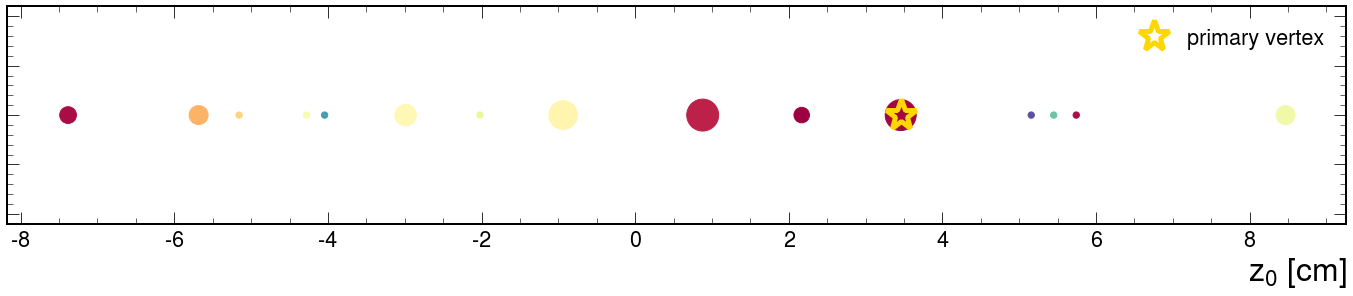

In [89]:
fig, ax = plt.subplots(figsize=(24, 4))
colors = [
    matplotlib.cm.Spectral(float(i) / 10 * random.random())
    for i in range(len(mean_z0_dbscan))
]
ax.scatter(
    mean_z0_dbscan["trk_z0"],
    len(mean_z0_dbscan) * [1],
    s=mean_z0_dbscan["dbscan_labels"] * 20,
    color=colors,
)
ax.set_xlabel(r"$z_{0}$ [cm]", fontsize=32)
y = 1
# for i, (txt, x) in enumerate(zip(mean_z0.index.values, mean_z0["tp_z0"].values)):
#     #     if y == 0:
#     #         y = 1.025
#     #     else:
#     #         y = 0.975

#     ax.annotate(txt, (x, y + random.uniform(-0.050, 0.050)), fontsize=10)
ax.plot(
    mean_z0_dbscan["trk_z0"][3],
    [1],
    linestyle="None",
    marker="*",
    markerfacecolor="None",
    markersize=32,
    markeredgewidth=5,
    markeredgecolor="gold",
    label="primary vertex",
)
ax.legend()
_ = ax.set_yticklabels([])

## DBSCAN For All events

In [90]:
def pv_dbscan(z0, pt):

    results = pd.DataFrame({})

    results["trk_z0"] = z0
    results["trk_pt"] = pt

    db_clustering = DBSCAN(eps=0.08, min_samples=2).fit(z0.values.reshape(-1, 1))

    results["dbscan_labels"] = db_clustering.labels_

    mean_z0_dbscan = results.groupby(["dbscan_labels"]).agg(
        {"dbscan_labels": "count", "trk_z0": "median", "trk_pt": "sum"}
    )

    return mean_z0_dbscan.sort_values(by=["trk_pt"], ascending=False).iloc[0, :]

In [91]:
z0_dbscan = trk.groupby(level=0).apply(lambda x: pv_dbscan(x["trk_z0"], x["trk_pt"]))

In [92]:
z0_dbscan

,dbscan_labels,trk_z0,trk_pt
entry,,,
0,34.0,3.515625,261.538940
1,18.0,0.205078,138.669434
2,16.0,-2.578125,153.659012
3,22.0,1.464844,100.312935
4,24.0,-3.750000,70.215225
...,...,...,...
24943,30.0,-0.410156,80.503448
24944,33.0,-2.050781,221.086456
24945,34.0,-2.285156,211.943390


In [93]:
reco

,z0_gen,z0_fastHisto
entry,,
0,3.499750,3.507812
1,0.338214,0.234375
2,-2.649157,-2.607422
3,1.543104,1.582031
4,2.421834,2.333984
...,...,...
24943,1.910414,1.851562
24944,-2.066012,-2.024740
24945,-2.285170,-2.316406


In [94]:
reco["z0_dbscan"] = z0_dbscan["trk_z0"]

In [95]:
primary_vertex_efficiency(reco["z0_gen"].values, reco["z0_fastHisto"].values)

65.92111592111593

In [96]:
primary_vertex_efficiency(reco["z0_gen"].values, reco["z0_dbscan"].values)

74.58313291646625

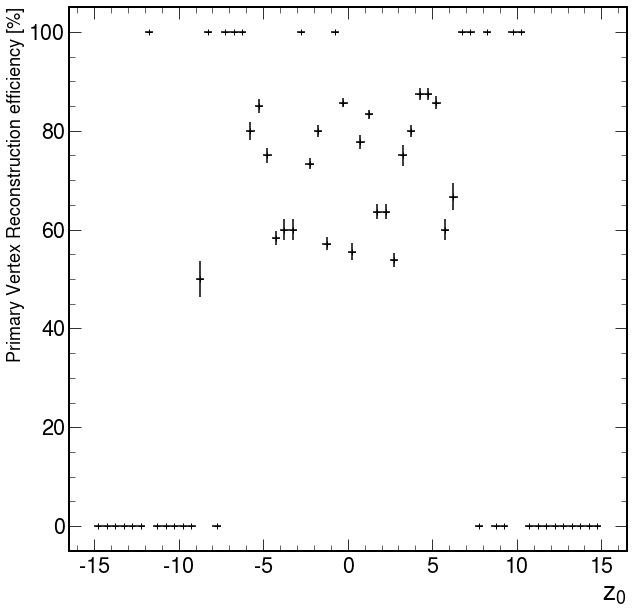

In [97]:
plot_pv_efficiency_z0(reco["z0_gen"].values, reco["z0_dbscan"].values, bins=be_eff)

# HDBSCAN test

In [98]:
from hdbscan import HDBSCAN

In [99]:
def pv_hdbscan(z0, pt):

    results = pd.DataFrame({})

    results["trk_z0"] = z0
    results["trk_pt"] = pt

    clustering = HDBSCAN(min_samples=4).fit(z0.values.reshape(-1, 1))

    results["hdbscan_labels"] = clustering.labels_

    mean_z0_dbscan = results.groupby(["hdbscan_labels"]).agg(
        {"hdbscan_labels": "count", "trk_z0": "median", "trk_pt": "sum"}
    )

    return mean_z0_dbscan.sort_values(by=["trk_pt"], ascending=False).iloc[0, :]

In [100]:
z0_hdbscan = trk.groupby(level=0).apply(lambda x: pv_hdbscan(x["trk_z0"], x["trk_pt"]))

In [101]:
reco["z0_hdbscan"] = z0_hdbscan["trk_z0"]

In [102]:
primary_vertex_efficiency(reco["z0_gen"].values, reco["z0_hdbscan"].values)

29.20073753407087

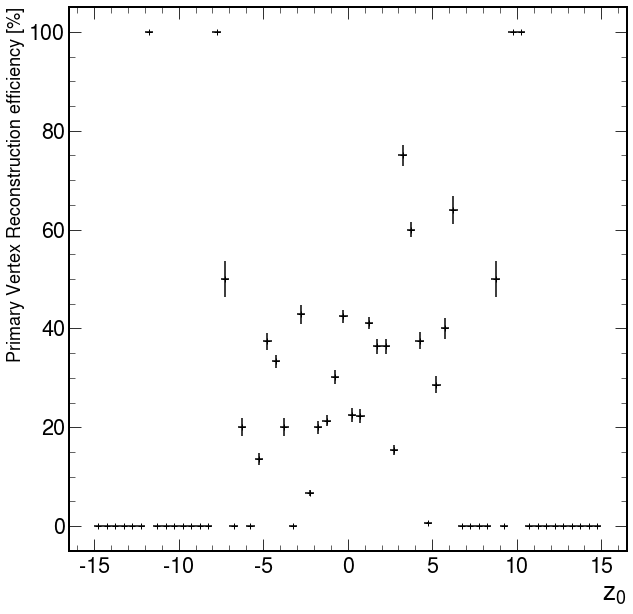

In [103]:
plot_pv_efficiency_z0(reco["z0_gen"].values, reco["z0_hdbscan"].values, bins=be_eff)

/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

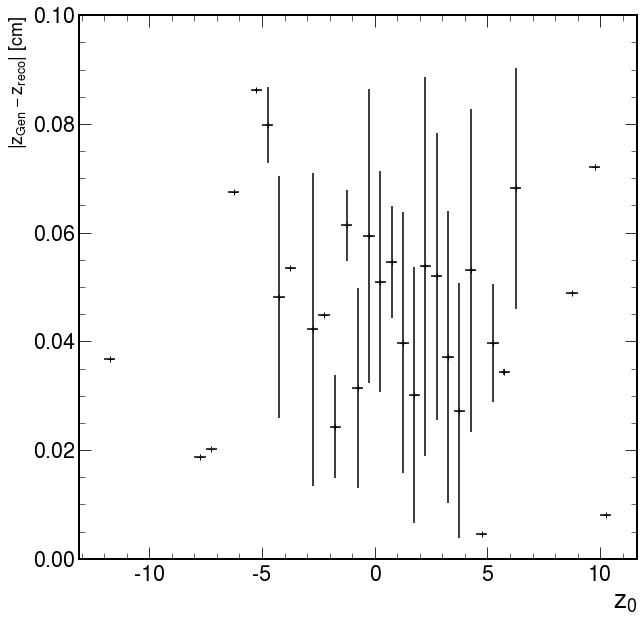

In [104]:
plot_pv_resolution_z0(
    reco["z0_gen"].values, reco["z0_hdbscan"].values, bins=be_eff, ylim=[0, 0.1]
)

**Quite surprisingly, HDBSCAN, does not perform well at all. Primary vertex efficiency is below 40% for everything**

# Hyper Parameter scan

It is clear that we should look into how the performance of both dbscan, hdbscan and fastHisto vary with the different hyperparameters

## FastHisto Bin widths scan

In [105]:
bin_widths = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35]

In [106]:
for bin_width in bin_widths:
    print(bin_width)
    be = np.arange(-15, 15 + bin_width, bin_width)

    _z0_fastHisto = trk.groupby(level=0).apply(
        lambda x: fastHisto(x["trk_z0"], x["trk_pt"], be)
    )

    reco[f"z0_fastHisto_{bin_width}"] = _z0_fastHisto

0.05
0.1
0.15
0.2
0.25
0.3
0.35


In [107]:
fast_histo_eff = []
for bin_width in bin_widths:

    fast_histo_eff.append(
        primary_vertex_efficiency(
            reco["z0_gen"].values, reco[f"z0_fastHisto_{bin_width}"]
        )
    )

Text(0.05, 69, 'Max Efficiency 69.26 (%)')

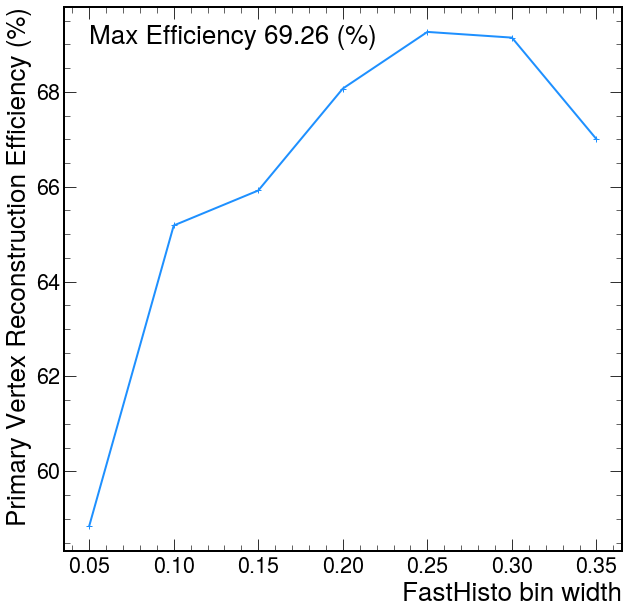

In [109]:
plt.plot(bin_widths, fast_histo_eff, "+-", lw=2, color="dodgerblue")
plt.ylabel("Primary Vertex Reconstruction Efficiency (%)")
plt.xlabel("FastHisto bin width")
plt.text(
    0.05,
    69,
    f"Max Efficiency {round(max(fast_histo_eff),2)} (%)",
)

## DBSCAN Optimization

In [110]:
def pv_dbscan(z0, pt, eps, min_samples):

    results = pd.DataFrame({})

    results["trk_z0"] = z0
    results["trk_pt"] = pt

    db_clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(
        z0.values.reshape(-1, 1)
    )

    results["dbscan_labels"] = db_clustering.labels_

    mean_z0_dbscan = results.groupby(["dbscan_labels"]).agg(
        {"dbscan_labels": "count", "trk_z0": "median", "trk_pt": "sum"}
    )

    return mean_z0_dbscan.sort_values(by=["trk_pt"], ascending=False).iloc[0, :]

In [111]:
eps_values = [0.01, 0.05, 0.08, 0.1, 0.15, 0.20, 0.25]
min_pts = [2, 3, 4, 5, 6]

In [ ]:
i = 0
for eps in eps_values:
    for min_samples in min_pts:
        i+=1
        print(i, eps, min_samples)
        z0_dbscan = trk.groupby(level=0).apply(
            lambda x: pv_dbscan(x["trk_z0"], x["trk_pt"], eps, min_samples)
        )

        reco[f"z0_dbscan_e{eps}_min_{min_samples}"] = z0_dbscan["trk_z0"]

reco.to_pickle('reco.pkl')

1 0.01 2
2 0.01 3
3 0.01 4
4 0.01 5
5 0.01 6
6 0.05 2
7 0.05 3
8 0.05 4
9 0.05 5
10 0.05 6
11 0.08 2
12 0.08 3
13 0.08 4
14 0.08 5
15 0.08 6


In [115]:
reco_load = pd.read_pickle('reco.pkl')

In [116]:
reco_load

,z0_gen,z0_fastHisto,z0_dbscan,z0_hdbscan,z0_fastHisto_0.05,z0_fastHisto_0.1,z0_fastHisto_0.15,z0_fastHisto_0.2,z0_fastHisto_0.25,z0_fastHisto_0.3,z0_fastHisto_0.35,z0_dbscan_e0.01_min_2,z0_dbscan_e0.01_min_3,z0_dbscan_e0.01_min_4,z0_dbscan_e0.01_min_5,z0_dbscan_e0.01_min_6,z0_dbscan_e0.05_min_2,z0_dbscan_e0.05_min_3,z0_dbscan_e0.05_min_4,z0_dbscan_e0.05_min_5,z0_dbscan_e0.05_min_6,z0_dbscan_e0.08_min_2,z0_dbscan_e0.08_min_3,z0_dbscan_e0.08_min_4,z0_dbscan_e0.08_min_5,z0_dbscan_e0.08_min_6,z0_dbscan_e0.1_min_2,z0_dbscan_e0.1_min_3,z0_dbscan_e0.1_min_4,z0_dbscan_e0.1_min_5,z0_dbscan_e0.1_min_6,z0_dbscan_e0.15_min_2,z0_dbscan_e0.15_min_3,z0_dbscan_e0.15_min_4,z0_dbscan_e0.15_min_5,z0_dbscan_e0.15_min_6,z0_dbscan_e0.2_min_2,z0_dbscan_e0.2_min_3,z0_dbscan_e0.2_min_4,z0_dbscan_e0.2_min_5,z0_dbscan_e0.2_min_6,z0_dbscan_e0.25_min_2,z0_dbscan_e0.25_min_3,z0_dbscan_e0.25_min_4,z0_dbscan_e0.25_min_5,z0_dbscan_e0.25_min_6
entry,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.499750,3.507812,3.515625,1.142578,3.574219,3.552246,3.507812,3.507812,3.601562,3.474609,3.662109,0.029297,-0.673828,0.175781,0.292969,0.292969,0.029297,-0.673828,0.175781,0.292969,0.292969,3.515625,3.515625,3.515625,3.515625,3.515625,3.515625,3.515625,3.515625,3.515625,3.515625,3.457031,3.457031,3.457031,3.457031,3.457031,3.457031,3.457031,3.457031,3.457031,3.457031,3.457031,3.457031,3.457031,3.457031,3.457031
1,0.338214,0.234375,0.205078,0.175781,0.292969,0.253906,0.234375,0.267857,0.169271,0.191761,0.205078,-0.410156,0.498047,0.703125,0.644531,0.644531,-0.410156,0.498047,0.703125,0.644531,0.644531,0.205078,1.582031,1.640625,1.464844,1.113281,0.205078,1.582031,1.640625,1.464844,1.113281,0.644531,0.644531,0.585938,-0.468750,-0.498047,0.644531,0.644531,0.644531,0.615234,0.585938,0.527344,0.527344,0.527344,0.527344,0.615234
2,-2.649157,-2.607422,-2.578125,-2.578125,-2.578125,-2.560547,-2.607422,-2.560547,-2.589844,-2.589844,-2.589844,-0.527344,0.117188,0.292969,0.117188,0.117188,-0.527344,0.117188,0.292969,0.117188,0.117188,-2.578125,-2.578125,-0.498047,0.000000,0.234375,-2.578125,-2.578125,-0.498047,0.000000,0.234375,-2.578125,-2.578125,-2.578125,-2.578125,-0.351562,-1.406250,-1.406250,-1.406250,-2.109375,-2.519531,-0.439453,-0.439453,-0.439453,-0.439453,-0.439453
3,1.543104,1.582031,1.464844,1.523438,1.406250,1.439732,1.582031,1.480824,1.628906,1.628906,1.582031,0.058594,0.644531,0.351562,0.820312,0.820312,0.058594,0.644531,0.351562,0.820312,0.820312,1.464844,1.875000,0.058594,0.058594,1.201172,1.464844,1.875000,0.058594,0.058594,1.201172,1.494141,1.494141,3.574219,-0.087891,-0.234375,1.406250,1.406250,1.406250,1.523438,3.925781,1.406250,1.406250,1.406250,1.406250,1.113281
4,2.421834,2.333984,-3.750000,2.343750,2.343750,2.343750,2.333984,2.333984,2.343750,2.333984,2.343750,-0.820312,-1.113281,-1.083984,-1.318359,-1.318359,-0.820312,-1.113281,-1.083984,-1.318359,-1.318359,-3.750000,-0.175781,-0.820312,-0.380859,-1.054688,-3.750000,-0.175781,-0.820312,-0.380859,-1.054688,2.343750,2.343750,2.343750,-0.644531,-0.380859,-0.878906,-0.878906,-0.878906,-0.878906,3.134766,-0.878906,-0.878906,-0.878906,-0.878906,-0.878906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24943,1.910414,1.851562,-0.410156,1.933594,1.933594,1.933594,1.851562,1.851562,1.851562,1.851562,1.966146,-0.527344,-0.234375,0.234375,0.439453,0.468750,-0.527344,-0.234375,0.234375,0.439453,0.468750,-0.410156,2.783203,1.142578,2.109375,0.761719,-0.410156,2.783203,1.142578,2.109375,0.761719,0.234375,0.234375,1.582031,1.582031,2.109375,0.117188,0.117188,0.117188,0.205078,0.205078,0.468750,0.468750,0.468750,0.468750,0.468750
24944,-2.066012,-2.024740,-2.050781,0.791016,-2.050781,-2.050781,-2.024740,-2.091797,-2.130301,-1.964614,-2.153320,-0.058594,0.117188,0.292969,0.292969,-0.527344,-0.058594,0.117188,0.292969,0.292969,-0.527344,-2.050781,-2.050781,-2.050781,-1.289062,-0.11

In [120]:
eps_grid = np.zeros(len(eps_values)*len(min_pts))
minPts_grid = np.zeros(len(eps_values)* len(min_pts))
pv_eff = np.zeros(len(eps_values) * len(min_pts))

In [121]:
i =0 
for eps in eps_values:
    for min_samples in min_pts:
        eps_grid[i] = eps
        minPts_grid[i] = min_samples
        
        pv_eff[i] = primary_vertex_efficiency(reco['z0_gen'], reco[f'z0_dbscan_e{eps}_min_{min_samples}'])
        
        i+=1

In [122]:
pv_eff

array([ 1.98412698,  4.76190476,  6.34920635,  7.14285714,  7.53968254,
        1.98412698,  4.76190476,  6.34920635,  7.14285714,  7.53968254,
       74.58313292, 56.66987334, 39.79878147, 19.94147827, 12.28555395,
       74.58313292, 56.66987334, 39.79878147, 19.94147827, 12.28555395,
       69.82523649, 68.6347603 , 64.27368927, 53.92015392, 45.98364598,
       54.36107103, 54.36107103, 55.94837262, 59.57190957, 56.02453102,
       42.85313452, 42.85313452, 44.04361071, 48.40869008, 49.6031746 ])

In [123]:
optimization_results = pd.DataFrame({'eps':eps_grid,'minPts':minPts_grid,'Efficiency':pv_eff})

In [125]:
optimization_results.to_pickle('optimization_results.pkl')

In [ ]:
primary_vertex_efficiency(re)

# Histogram of Resolution

In [126]:
print("hello")

hello


In [142]:
resolution = pd.DataFrame({})
spread = pd.DataFrame({})

In [143]:
for column in reco.columns:
    resolution[column] = np.abs(reco['z0_gen'] - reco[column])
    spread[column] = reco['z0_gen'] - reco[column]

0.04858938
0.026315032
0.04281144518591994
0.029354966161906266


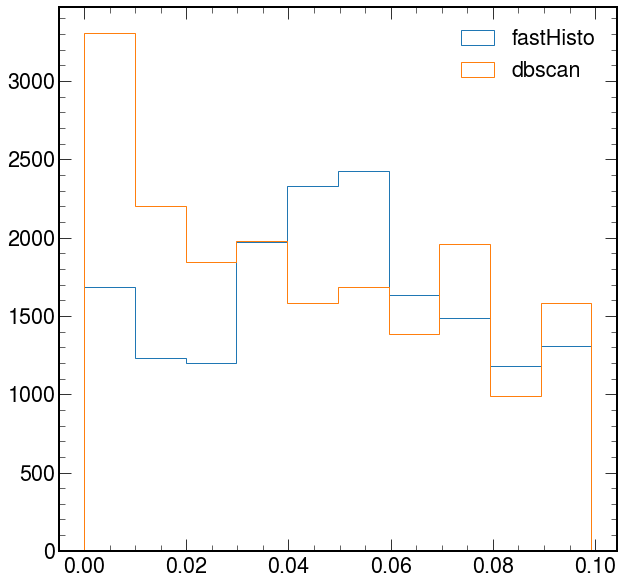

In [151]:
mask_fastHisto = resolution['z0_fastHisto'] < 0.1
mask_dbscan = resolution['z0_dbscan'] < 0.1

print(resolution.loc[mask_fastHisto,'z0_fastHisto'].mean())
print(resolution.loc[mask_fastHisto,'z0_fastHisto'].std())
print(resolution.loc[mask_dbscan,'z0_dbscan'].mean())
print(resolution.loc[mask_dbscan,'z0_dbscan'].std())

_,be,_ = plt.hist(resolution.loc[mask_fastHisto,'z0_fastHisto'].values, histtype='step', bins =10, label='fastHisto')
_,_,_ = plt.hist(resolution.loc[mask_dbscan,'z0_dbscan'].values, histtype='step', bins = be, label='dbscan')
plt.legend()

In [177]:
from scipy.stats import iqr

-0.008863449
0.1321427822113037
-0.0014634132385253906
0.09619006514549255


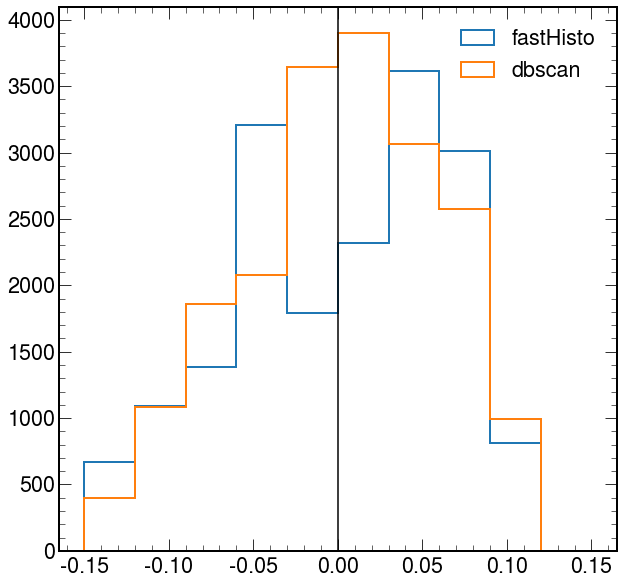

In [181]:
mask_fastHisto = spread["z0_fastHisto"] < 0.1
mask_dbscan = spread["z0_dbscan"] < 0.1

print(spread.loc[mask_fastHisto, "z0_fastHisto"].median())
print(iqr(spread.loc[mask_fastHisto, "z0_fastHisto"]))
print(spread.loc[mask_dbscan, "z0_dbscan"].median())
print(iqr(spread.loc[mask_dbscan, "z0_dbscan"]))

_, be, _ = plt.hist(
    spread.loc[mask_fastHisto, "z0_fastHisto"].values,
    histtype="step",
    bins=10,
    range=(-0.15, 0.15),
    label="fastHisto",
    lw=2,
)
_, _, _ = plt.hist(
    spread.loc[mask_dbscan, "z0_dbscan"].values,
    histtype="step",
    bins=be,
    range = (-0.15, 0.15),
    label="dbscan",
    lw=2,
)
plt.legend()
plt.axvline(0, ls='-',color='black')

In [155]:
import seaborn as sns

(0.0, 0.15)

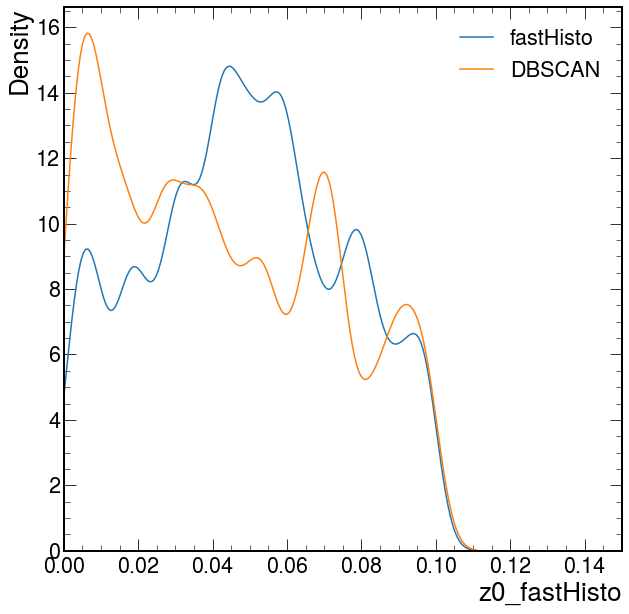

In [164]:
mask_fastHisto = resolution["z0_fastHisto"] < 0.1
mask_dbscan = resolution['z0_dbscan'] < 0.1



sns.kdeplot(data=resolution.loc[(np.abs(resolution['z0_fastHisto'] < 0.15)) &mask_fastHisto], x='z0_fastHisto', label = 'fastHisto')
sns.kdeplot(data=resolution.loc[(np.abs(resolution['z0_dbscan'] < 0.15)) &mask_dbscan], x='z0_dbscan',label='DBSCAN')

plt.legend()
plt.xlim(0, 0.15)

(-0.15, 0.15)

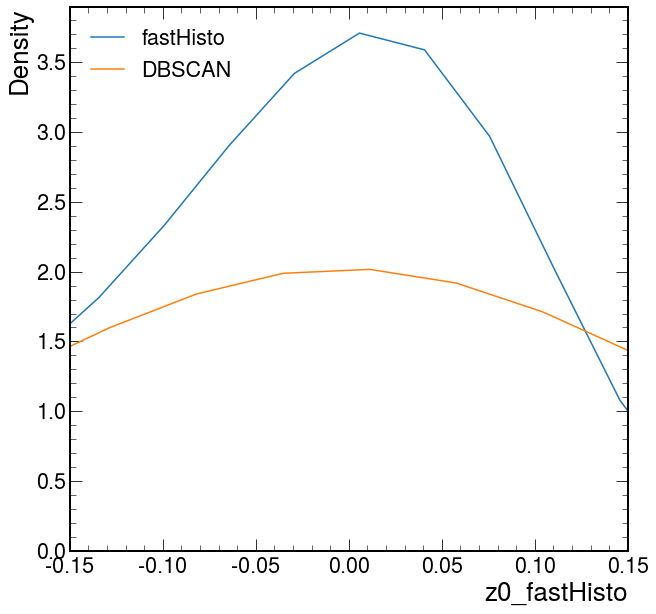

In [165]:
mask_fastHisto = spread["z0_fastHisto"] < 0.1
mask_dbscan = spread['z0_dbscan'] < 0.1



sns.kdeplot(data=spread.loc[(np.abs(spread['z0_fastHisto'] < 0.15)) & mask_fastHisto], x='z0_fastHisto', label = 'fastHisto')
sns.kdeplot(data=spread.loc[(np.abs(spread['z0_dbscan'] < 0.15)) & mask_dbscan], x='z0_dbscan',label='DBSCAN')

plt.legend()
plt.xlim(-0.15, 0.15)

(-0.15, 0.15)

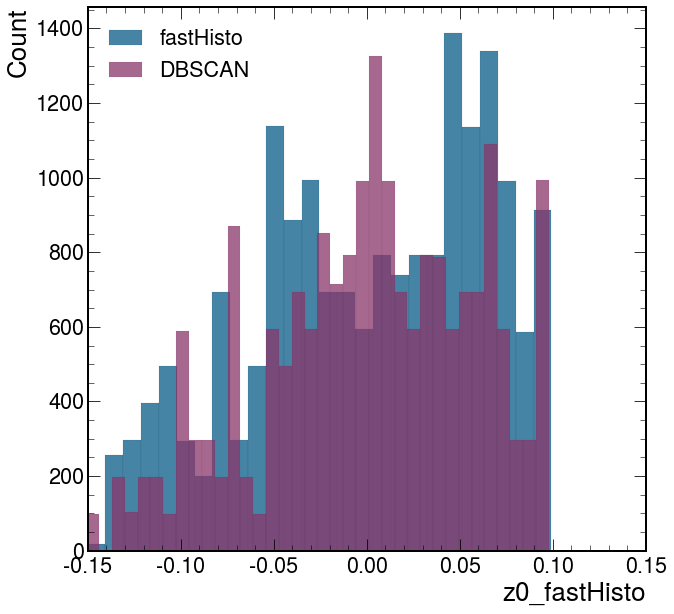

In [174]:
mask_fastHisto = spread["z0_fastHisto"] < 0.1
mask_dbscan = spread["z0_dbscan"] < 0.1


sns.histplot(
    data=spread.loc[(np.abs(spread["z0_fastHisto"] < 0.15)) & mask_fastHisto],
    x="z0_fastHisto",
    label="fastHisto",
    color='#4684A6',
    alpha=1
)
sns.histplot(
    data=spread.loc[(np.abs(spread["z0_dbscan"] < 0.15)) & mask_dbscan],
    x="z0_dbscan",
    label="DBSCAN",
    color='#8A366A',
    
)

plt.legend()
plt.xlim(-0.15, 0.15)

69.26406926406926

In [233]:
for bin_width in bin_widths:
    print(f"fastHisto_{bin_width}")

fastHisto_0.05
fastHisto_0.1
fastHisto_0.15
fastHisto_0.2
fastHisto_0.25
fastHisto_0.3
fastHisto_0.35


In [ ]:
be = np.arange(-15, 15.15, 0.15)  # z_0 in [-15, 15]

In [ ]:
def fastHisto(z0, pt, be):

    h = np.histogram(z0, bins=be, weights=pt)[0]
    max_idx = np.argmax(h)
    bin_lower = be[max_idx]
    bin_upper = be[max_idx + 1]
    mask = (z0 > bin_lower) & (z0 < bin_upper)
    z0_reco = z0[mask].mean()

    return z0_reco

In [ ]:
z0_fastHisto = trk.groupby(level=0).apply(
    lambda x: fastHisto(x["trk_z0"], x["trk_pt"], be)
)

In [236]:
test = pd.DataFrame({})

In [237]:
test["z0_fastHisto"] = z0_fastHisto

In [239]:
test.columns

Index(['z0_fastHisto'], dtype='object')

The big question here is how to compare the performance of the dbscan with the generated data ?

In [99]:
tp.groupby(level=0)["tp_pt"].first()

entry
0        100.300301
1          2.806677
2         39.352680
3          2.047890
4         45.843182
            ...    
24943     45.743790
24944      4.743241
24945      2.080068
24946      7.707239
24947      2.467850
Name: tp_pt, Length: 24948, dtype: float32

In [100]:
tp.index

MultiIndex([(    0,   0),
            (    0,   1),
            (    0,   2),
            (    0,   3),
            (    0,   4),
            (    0,   5),
            (    0,   6),
            (    0,   7),
            (    0,   8),
            (    0,   9),
            ...
            (24947, 126),
            (24947, 127),
            (24947, 128),
            (24947, 129),
            (24947, 130),
            (24947, 131),
            (24947, 132),
            (24947, 133),
            (24947, 134),
            (24947, 135)],
           names=['entry', 'subentry'], length=4421637)

In [103]:
tp.groupby(level=0)["tp_pt"].count().median()

177.0